In [1]:
%matplotlib inline
import composeml as cp

In [2]:
df = cp.demos.load_transactions()

df[df.columns[:7]].head()

,transaction_id,session_id,transaction_time,product_id,amount,customer_id,device
0,298,1,2014-01-01 00:00:00,5,127.64,2,desktop
1,10,1,2014-01-01 00:09:45,5,57.39,2,desktop
2,495,1,2014-01-01 00:14:05,5,69.45,2,desktop
3,460,10,2014-01-01 02:33:50,5,123.19,2,tablet
4,302,10,2014-01-01 02:37:05,5,64.47,2,tablet


In [3]:
def total_spent(df):
    total = df['amount'].sum()
    return total

In [4]:
label_maker = cp.LabelMaker(
    target_entity="customer_id",
    time_index="transaction_time",
    labeling_function=total_spent,
    window_size="1h",
)

In [5]:
labels = label_maker.search(
    df.sort_values('transaction_time'),
    num_examples_per_instance=-1,
    gap=1,
    verbose=True,
)

labels.head()

Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|██████████| customer_id: 5/5 


,customer_id,cutoff_time,total_spent
id,,,
0,1,2014-01-01 00:45:30,914.73
1,1,2014-01-01 00:46:35,806.62
2,1,2014-01-01 00:47:40,694.09
3,1,2014-01-01 00:52:00,687.80
4,1,2014-01-01 00:53:05,656.43


In [6]:
labels = labels.threshold(300)

labels.head()

,customer_id,cutoff_time,total_spent
id,,,
0,1,2014-01-01 00:45:30,True
1,1,2014-01-01 00:46:35,True
2,1,2014-01-01 00:47:40,True
3,1,2014-01-01 00:52:00,True
4,1,2014-01-01 00:53:05,True


In [7]:
labels = labels.apply_lead('1h')

labels.head()

,customer_id,cutoff_time,total_spent
id,,,
0,1,2013-12-31 23:45:30,True
1,1,2013-12-31 23:46:35,True
2,1,2013-12-31 23:47:40,True
3,1,2013-12-31 23:52:00,True
4,1,2013-12-31 23:53:05,True


In [8]:
labels.describe()

Label Distribution
------------------
False      56
True       44
Total:    100


Settings
--------
gap                                    1
label_type                      discrete
labeling_function            total_spent
minimum_data                        None
num_examples_per_instance             -1
target_entity                customer_id
window_size                       <Hour>


Transforms
----------
1. threshold
  - value:    300

2. apply_lead
  - value:    1h



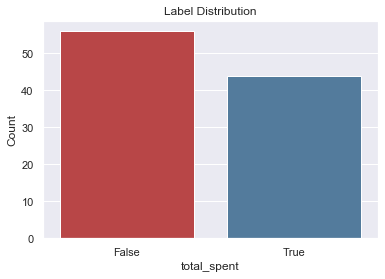

In [9]:
labels.plot.distribution();

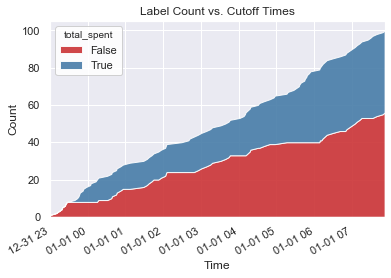

In [10]:
labels.plot.count_by_time();